## Visualize the filter

In [1]:
from keras.applications import VGG16
from keras import backend as K

import matplotlib.pyplot as plt
import numpy as np

In [37]:
model = VGG16(weights='imagenet', include_top = False)
filter_index = 0
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [23]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    x = np.clip(x,0,1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [24]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])
    
    grads = K.gradients(loss, model.input)[0]
    
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    
    loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
    input_img_data = np.random.random((1,150,150,3)) * 20 + 128
    
    step = 1
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    plt.imshow(deprocess_image(input_img_data[0]))

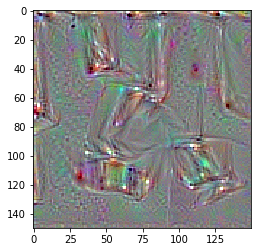

In [27]:
generate_pattern('block5_conv1', 5)

## CAM (class activation map) 
Grad-CAM is used in this book

In [48]:
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 1000s 2us/step


In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions